# 1) Get Data

In [3]:
!pip install xgboost
!pip install tabulate
!pip install imblearn
# jupyter contrib nbextension install --user
# jupyter nbextension enable toc2/main
# !jupyter labextension install @jupyterlab/toc

You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#RUNPCA 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle 
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import time
from scipy.stats import randint as sp_randint
import seaborn as sns

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from tabulate import tabulate
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt



In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)

In [6]:
# df = pd.read_csv("./dataframe.csv")
df = pd.read_pickle("dataframe.pkl")
df.head() # shape = (278220, 35)

,Year,Month,Day,hour,pressure,humidity,temperature,wind_direction,wind_speed,description,Origin,Flights,Dest,DepTime,DepDelay,DepDelayMinutes,DepDel15,CRSDepTime,Distance,DepartureDelayGroups,TaxiOut,TaxiIn,ArrTime,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode,FlightNum,SchedDepartTime
0,2015.0,1.0,1.0,5,1043.0,80.0,273.207333,317.0,1.0,few clouds,ATL,1.0,IAD,556.0,16.0,16.0,1.0,540,534.0,1.0,9.0,15.0,739.0,14.0,0.0,0.0,79.0,534.0,0.0,0.0,0.0,0.0,0.0,0,EV3268,540.0
1,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,MIA,656.0,-4.0,0.0,0.0,700,594.0,-1.0,15.0,9.0,842.0,-10.0,0.0,0.0,82.0,594.0,0.0,0.0,0.0,0.0,0.0,0,AA17,660.0
2,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,LGA,644.0,-1.0,0.0,0.0,645,762.0,-1.0,31.0,9.0,901.0,8.0,0.0,0.0,97.0,762.0,0.0,0.0,0.0,0.0,0.0,0,DL886,645.0
3,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,MCO,654.0,-1.0,0.0,0.0,655,404.0,-1.0,14.0,8.0,815.0,-7.0,0.0,0.0,59.0,404.0,0.0,0.0,0.0,0.0,0.0,0,DL1818,655.0
4,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,CLT,658.0,-2.0,0.0,0.0,700,226.0,-1.0,15.0,10.0,801.0,-11.0,0.0,0.0,38.0,226.0,0.0,0.0,0.0,0.0,0.0,0,US461,660.0


In [7]:
df=df[['DepDelay','hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime','AirTime']]
# 'DepTime' 'ArrTime' 'AirTime']

In [8]:
df["Origin"].describe()
# df=df[df["Origin"]=="ATL"]
df.tail()

X=df[['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime','AirTime']]
y = df['DepDelay']

In [9]:
features123=X
categorical_subset = features123[['Origin','Dest','description']]
numeric_subset=features123[['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'Distance']]
numeric_subset_columns=['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'Distance']
# One hot encode

categorical_subset = pd.get_dummies(categorical_subset)
#normalize categorical 
numeric_subset = numeric_subset[numeric_subset_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# numeric_subset

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features1234 = pd.concat([numeric_subset, categorical_subset], axis = 1)

features1234.head()

,hour,pressure,humidity,temperature,wind_speed,Distance,Distance,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_ORD,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACT,Dest_AEX,Dest_AGS,Dest_ALB,...,description_freezing rain,description_haze,description_heavy intensity drizzle,description_heavy intensity rain,description_heavy snow,description_light intensity drizzle,description_light rain,description_light snow,description_mist,description_moderate rain,description_overcast clouds,description_proximity shower rain,description_proximity thunderstorm,description_scattered clouds,description_sky is clear,description_smoke,description_snow,description_thunderstorm,description_thunderstorm with rain,description_very heavy rain
0,0.217391,0.826446,0.784946,0.454565,0.058824,0.105299,0.105299,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.260870,0.826446,0.784946,0.450220,0.058824,0.118828,0.118828,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.260870,0.826446,0.784946,0.450220,0.058824,0.156708,0.156708,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.260870,0.826446,0.784946,0.450220,0.058824,0.075986,0.075986,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.260870,0.826446,0.784946,0.450220,0.058824,0.035851,0.035851,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
features1234.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278220 entries, 0 to 50722
Columns: 285 entries, hour to description_very heavy rain
dtypes: float64(7), uint8(278)
memory usage: 90.7 MB


In [11]:
features = features1234 #(278220, 13)
targets = y #pd.DataFrame(y)  #278220,)
y_value=y
print(features.shape)
print(targets.shape)
print(y_value.shape)

(278220, 285)
(278220,)
(278220,)


In [12]:
# changing to binary
def delay(targets):
    if targets > 15:
        return 1
    else:
        return 0
targets=targets.apply(delay)
print(targets.shape)

(278220,)


# Models: PCA,SMOTE,Random Forest Classifier Below

In [17]:
from sklearn.decomposition import PCA
pca = PCA()#n_components=2)
pca.fit_transform(features,targets)
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
# print(pd.Series(var_explained))
###since they explain less than.01 of the variance
# print(sum(var_explained[0:90]))


In [14]:
print(len(var_explained))
print(sum(var_explained[0:130]))
#120 is the number of features that explain 94% of the variance

285
0.9511348058341366


# PCA: 130 of 285 features explain 95% of variance

In [65]:
pca=PCA(n_components=140)
# pca=PCA(n_components=130)
X_new=pca.fit_transform(features)
# X_new=pca.fit_transform(features,targets)
X_new.shape

(278220, 180)

In [63]:
print(features.shape)
print(X_new.shape)
print(targets.shape)

(278220, 285)
(278220, 180)
(278220,)


In [2]:
explained_variance=pca.explained_variance_ratio_
len(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(130), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [66]:
# Split into 70% training and 30% testing set using the PCA X value of features: X_new

training_features, test_features,training_target, test_target, = train_test_split(features, targets, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(225358, 285)
(25040, 285)
(225358,)
(25040,)


In [ ]:
#smote only on the training features because of large class imbalance
sm = SMOTE(k_neighbors=5, kind = 'regular', ratio='auto')#(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [ ]:
# Compute the components and projected faces
pca = PCA(130).fit(x_train_res)
components = pca.transform(x_train_res)
projected = pca.inverse_transform(components)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

print(sum(var_explained[0:130]))

In [22]:
print(sum(var_explained[0:130]))

0.9511348058341366


# Model PCA and LogisticRegression: accuracy is 0.6351038338658147

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.1, random_state = 42)

In [ ]:
pca = PCA(n_components = 160) #only include first 80 components
logistic = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
# forest_one = RandomForestClassifier(n_estimators=130, random_state=12)
pca = PCA()
pipeline = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
# fit = pipeline.fit(features, targets) #fit model
fit = pipeline.fit(X_train, y_train)#fit model
prediction = pipeline.predict(X_test) #test model wit

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
print ('Validation Results')
print (pipeline.score(x_val, y_val))
print (recall_score(y_val, prediction))
print ('\nTest Results')
print (pipeline.score(test_features, test_target))
print (recall_score(test_target, pipeline.predict(test_features)))

# Summary of the predictions made by the classifier
print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))
# Accuracy score
print('accuracy is',accuracy_score(prediction,y_val))

# Model RandomForestClassifier(n_estimators=130): accuracy is 0.8123427503414564

In [21]:
x_train6, x_val6, y_train6, y_val6 = train_test_split(features, targets,test_size = .1,random_state=12)

clf_rf = RandomForestClassifier(n_estimators=130, random_state=12)
clf_rf.fit(x_train6, y_train6)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [22]:
#Predict
y_pred6=clf_rf.predict(x_val6)
print(classification_report(y_val6, y_pred6))
print(confusion_matrix(y_pred6,y_val6))
# Accuracy score
print('accuracy is',accuracy_score(y_pred6,y_val6))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     22320
           1       0.55      0.30      0.39      5502

   micro avg       0.81      0.81      0.81     27822
   macro avg       0.70      0.62      0.64     27822
weighted avg       0.79      0.81      0.79     27822

[[20963  3864]
 [ 1357  1638]]
accuracy is 0.8123427503414564


# Save model info

In [1]:
### save the model to disk
# filename = 'flightpcaandrandomforest120_model.sav'
# pickle.dump(clf_rf, open(filename, 'wb'))
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_val, y_val)
# print(result)

# For loop to ID best n_estimators for RandomForest

In [ ]:
# x_train6, x_val6, y_train6, y_val6 = train_test_split(features, targets,test_size = .1,random_state=12)

training_features, test_features,training_target, test_target, = train_test_split(features, targets, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .2,
                                                  random_state=12)
model = RandomForestRegressor()# ** RUN
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(100, 160, 10)
scores = []

for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_val, y_val))


In [ ]:
print(scores) 

In [ ]:
print(scores)    
# [0.06876993650387908, 0.06814176310778741, 0.06812073297087695, 0.06546792401222368, 0.06745140662252946, 0.07017185833784179, 0.07237041038395498, 0.07026188479434115, 0.07065780446412384, 0.0713504146699957, 0.07152587497511753, 0.07142876040901402, 0.07000811412510188]
len(scores)
scores1 =pd.DataFrame(estimators,scores)
print(scores1)
# 0.067451  110
# 0.070172  120
# 0.072370  130
# 0.070262  140
# 0.070658  150
# 0.071350  160
# 0.071526  170
# 0.071429  180
# 0.070008  190

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
#best is 130


# KNeighbors Classifier: accuracy is 0.6601837060702875

In [49]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
# training_features, test_features,training_target, test_target, = train_test_split(features, targets, test_size = 0.1, random_state = 42)
# x_train, x_val, y_train, y_val = train_test_split(features, targets,test_size = .1, random_state=12)
# (x_train_res, y_train_res)


# training_features, test_features,training_target, test_target, = train_test_split(features, targets, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(features, targets,test_size = .1,random_state=12)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(250398, 285)
(27822, 285)
(250398,)
(27822,)


In [51]:
#smote only on the training features 
# sm = SMOTE(k_neighbors=5, kind = 'regular', ratio='auto')
# x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [50]:
Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(x_train, y_train)
y_pred = Model.predict(x_val)

In [54]:
# filename = 'flightKneighborsModel.sav'
# pickle.dump(Model, open(filename, 'wb'))

In [51]:
print ('Validation Results')
print (Model.score(x_val, y_val))
print (recall_score(y_val, Model.predict(x_val)))
print ('\nTest Results')
print (Model.score(test_features, test_target))
print (recall_score(test_target, Model.predict(test_features)))
# Validation Results
# 0.6601837060702875
# 0.49724950884086444

# Test Results
# 0.661131478685932
# 0.4877599852751703

Validation Results
0.8026381999856229
0.09760087241003272

Test Results


ValueError: query data dimension must match training data dimension

In [ ]:
# Summary of the predictions made by the classifier
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
# # Accuracy score
print('accuracy is',accuracy_score(y_pred,y_val))

#  AdaBoostClassifier: accuracy is  0.76564807452005

In [48]:
from sklearn.ensemble import AdaBoostClassifier
x_train5, x_val5, y_train5, y_val5 = train_test_split(features, targets,test_size = .1,random_state=12)

Model=AdaBoostClassifier()
Model.fit(x_train5,y_train5) #(x_train_res,y_train_res)
#Predict
y_pred5=model.predict(x_val5)
print(classification_report(y_val5, y_pred5))
print(confusion_matrix(y_pred5,y_val5))
# Accuracy score
print('accuracy is',accuracy_score(y_pred5,y_val5))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70     22320
           1       0.28      0.65      0.39      5502

   micro avg       0.60      0.60      0.60     27822
   macro avg       0.57      0.62      0.54     27822
weighted avg       0.75      0.60      0.64     27822

[[13074  1940]
 [ 9246  3562]]
accuracy is 0.5979440730357272


# GradientBoostingClassifier: accuracy is 0.8067356768025303

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
x_train5, x_val5, y_train5, y_val5 = train_test_split(features, targets,test_size = .1,random_state=12)

Model=GradientBoostingClassifier()
Model.fit(x_train5,y_train5) #(x_train_res,y_train_res)
#Predict
y_pred5=model.predict(x_val5)

In [42]:
print(classification_report(y_val5, y_pred5))
print(confusion_matrix(y_pred5,y_val5))
# Accuracy score
print('accuracy is',accuracy_score(y_pred5,y_val5))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     22320
           1       0.63      0.05      0.10      5502

   micro avg       0.81      0.81      0.81     27822
   macro avg       0.72      0.52      0.50     27822
weighted avg       0.77      0.81      0.74     27822

[[22145  5202]
 [  175   300]]
accuracy is 0.8067356768025303


# Models LogisticRegression:  Accuracy of logistic regression classifier on test set: 0.81

In [75]:
x_train4, x_val4, y_train4, y_val4 = train_test_split(features, targets,test_size = .1,random_state=12)
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model = logreg.fit(x_train4,y_train4)
# print(Model) #Preview model params

#Predict
y_pred4=model.predict(x_val4)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_val4, y_val4)))
# print(classification_report(y_val4, y_pred4))
print(confusion_matrix(y_pred4,y_val4))
# Accuracy score
print('accuracy is',accuracy_score(y_pred4,y_val4))

# Accuracy of logistic regression classifier on test set: 0.81
# [[22145  5202]
#  [  175   300]]
# accuracy is 0.8067356768025303

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.81
[[22145  5202]
 [  175   300]]
accuracy is 0.8067356768025303


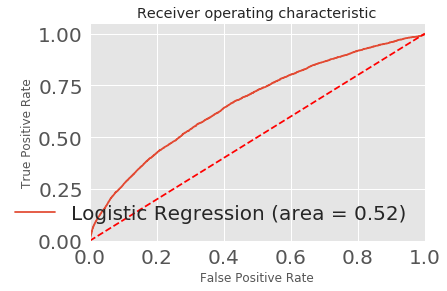

In [76]:
X_train,X_test,y_train,y_test=x_train4, x_val4, y_train4, y_val4
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
# x_train4, x_val4, y_train4, y_val4 = train_test_split(X_new, targets,test_size = .1,random_state=12)

# logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
# # logreg = LinearRegression(normalize=True)
# model = logreg.fit(x_train4,y_train4)

# #Predict
# y_pred4=model.predict(x_val4)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_val4, y_val4)))
# # print(classification_report(y_val4, y_pred4))
# print(confusion_matrix(y_pred4,y_val4))
# # Accuracy score
# print('accuracy is',accuracy_score(y_pred4,y_val4))

# Using X_new
# Accuracy of logistic regression classifier on test set: 0.60
# [[13074  1940]
#  [ 9246  3562]]
# accuracy is 0.5979440730357272

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.60
[[13074  1940]
 [ 9246  3562]]
accuracy is 0.5979440730357272


In [60]:
x_train5.shape

(250398, 130)

In [77]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# # X_train,X_test,y_train,y_test=x_train4, x_val4, y_train4, y_val4
# X_train,X_test,y_train,y_test=x_train5, x_val5, y_train5, y_val5
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [ ]:
# logistic = SGDClassifier(loss='log', penalty='l2', early_stopping=True,
#                          max_iter=10000, tol=1e-5, random_state=0)
# pca = PCA()
# forest_one = RandomForestClassifier(n_estimators=130, random_state=12)
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
# # pipe = Pipeline(steps=[('pca', pca), ('forest', forest_one)])


# X_digits = features
# y_digits = targets

# # Parameters of pipelines can be set using ‘__’ separated parameter names:
# param_grid = {
#     'pca__n_components': [70,75,90],
#     'logistic__alpha': np.logspace(-4, 4, 5),
    
# }
# search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
#                       return_train_score=False)
# search.fit(X_digits, y_digits)


# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_params_)
# # Best parameter (CV score=0.832):
# # {'logistic__alpha': 0.01, 'pca__n_components': 80}



In [ ]:
# # Plot the PCA spectrum
# pca.fit(X_digits)

# fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
# ax0.plot(pca.explained_variance_ratio_, linewidth=2)
# ax0.set_ylabel('PCA explained variance')

# ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
#             linestyle=':', label='n_components chosen')
# ax0.legend(prop=dict(size=12))

# # For each number of components, find the best classifier results
# results = pd.DataFrame(search.cv_results_)
# components_col = 'param_pca__n_components'
# best_clfs = results.groupby(components_col).apply(
#     lambda g: g.nlargest(1, 'mean_test_score'))

# best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
#                legend=False, ax=ax1)
# ax1.set_ylabel('Classification accuracy (val)')
# ax1.set_xlabel('n_components')

# plt.tight_layout()
# plt.show()

In [ ]:
# # SMOTE
# from imblearn.over_sampling import SMOTE, ADASYN
# print(y_train.value_counts()) #Previous original class distribution
# x_resampled, y_resampled = SMOTE(ratio="auto").fit_sample(X_train,y_train)
# print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution

# Newmodels to Run

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

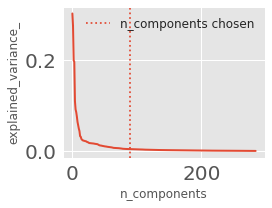

In [56]:
# logistic = linear_model.LogisticRegression()

# pca = decomposition.PCA()
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# X_digits = features
# y_digits = targets

# ###############################################################################
# # Plot the PCA spectrum
# pca.fit(X_digits)

# plt.figure(1, figsize=(4, 3))
# plt.clf()
# plt.axes([.2, .2, .7, .7])
# plt.plot(pca.explained_variance_, linewidth=2)
# plt.axis('tight')
# plt.xlabel('n_components')
# plt.ylabel('explained_variance_')

# ###############################################################################
# # Prediction

# n_components = [90, 100, 110,120]
# Cs = np.logspace(-4, 4, 3)

# #Parameters of pipelines can be set using ‘__’ separated parameter names:

# estimator = GridSearchCV(pipe,
#                          dict(pca__n_components=n_components,
#                               logistic__C=Cs))
# estimator.fit(features, targets)

# plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
#             linestyle=':', label='n_components chosen')
# plt.legend(prop=dict(size=12))
# plt.show()

In [ ]:


# # Mean Absolute Error
# from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(y_test1, y_pred1))
# # Mean Squared Error
# from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_test1, y_pred1))
# from sklearn.metrics import r2_score
# print(r2_score(y_test1, y_pred1))
# var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
# print(pd.Series(var_explained))
# ###Since 29 components aren't necessary, the last 20 PCs will be disregarded 
# ###since they explain less than.01 of the variance
# print(sum(var_explained[0:10]))

# # Mean Absolute Error
# from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(y_test1, y_pred1))
# # Mean Squared Error
# from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_test1, y_pred1))
# from sklearn.metrics import r2_score
# print(r2_score(y_test1, y_pred1))
# # feature importance
# # for feature in zip(features_names, rf.feature_importances_):
# #     print(feature)



# ## changed to calculate just with depdelay
# ##Convert y to set of classes



# # y_ontime = y[(y <= 15) & (y >= 0)] # 0 <= y <= 15 is on time by FAA standards
# # y_early = y[y < 0] # y < 0 is flight left early
# # y_delay = y[(y > 15) & (y <= 60)] # 15 < y <= 60 we'll consider as delayed
# # y_sig_delay = (y[y > 60]) # 60 < y we'll considered significantly delayed

# # y_early = ["y_early"]*len(y_early)
# # y_ontime = ['y_ontime']*len(y_ontime)
# # y_delay = ['y_delay']*len(y_delay)
# # y_sig_delay = ['y_sig_delay']*len(y_sig_delay)
# # y = pd.DataFrame(y_early + y_ontime + y_delay + y_sig_delay)

# # le = preprocessing.LabelEncoder()
# # le.fit(y)
# # # y = column(y, warn=True)
# # y_new = le.transform(y)
# # y_new.shape #(278220,)
# # y_new
# # y_new=y_new